In [2]:
import matplotlib
#%matplotlib
from matplotlib import animation
from numpy import append, cos, linspace, pi, sin, zeros
import matplotlib.pyplot as plt

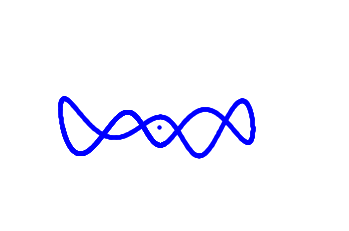

In [3]:
#set parameter to create DNA or gene plot
parameters = [0 - 15j, 5+2j, -5-5j, -14+40j, 0+0j]
#create fourier function
def fourier(t, C):
  f = zeros(t.shape)
  for k in range(len(C)):
    f += C.real[k] * cos(k*t) + C.imag[k] * sin(k*t)
  return f
#create shape of gene function from elephan function
def elephant(t, p):
  npar = 6
  Cx = zeros((npar,), dtype='complex')
  Cy = zeros((npar,), dtype='complex')
  Cx[1] = p[0].real * 1j
  Cy[1] = p[3].imag + p[0].imag * 1j
  Cx[2] = p[1].real * 1j
  Cy[2] = p[1].imag * 1j
  Cx[3] = p[2].real
  Cy[3] = p[2].imag * 1j
  Cx[5] = p[3].real
  x = append(fourier(t, Cy), [p[4].imag])
  y = -append(fourier(t, Cx), [-p[4].imag])
  return x, y

def init_plot():
  # draw the structure of dna
  x, y = elephant(linspace(2.9 * pi, 0.4 + 3.3 * pi, 1000), parameters)
  for ii in range(len(y) - 1):
    y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(0)) * parameters[4].real
  trunk.set_data(x, y)
  return trunk,

def move_trunk(i):
  x, y = elephant(linspace(2.9 * pi, 0.4 + 3.3 * pi, 1000), parameters)
  # move trunk to new position (but don't move eye stored at end or array)
  for ii in range(len(y) - 1):
      y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(i)) * parameters[4].real
  trunk.set_data(x, y)
  return trunk,

fig, ax = plt.subplots()

# initial the elephant body
x, y = elephant(t=linspace(0.4 + 1.3 * pi, 2.9 * pi, 1000), p=parameters)
plt.plot(x, y, 'b.')
plt.xlim([-75, 90])
plt.ylim([-70, 87])
plt.axis('off')
trunk, = ax.plot([], [], 'b.')  # initialize trunk

ani = animation.FuncAnimation(fig=fig,
                              func=move_trunk,
                              frames=1000,
                              init_func=init_plot,
                              interval=500,
                              blit=False,
                              repeat=True)
plt.show()

In [ ]:
#download the animated
Writer = animation.writers['ffmpeg']
metadata = dict(title='Elephant Trunk Wiggling', artist='Junjie Hu')
writer = Writer(fps=30, metadata=metadata, bitrate=1800)
ani.save(filename='dna_gene_wiggle.mp4', writer=writer)